#Create the environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/ESoWC

/content/drive/My Drive/ESoWC


In [ ]:
import pandas as pd
import xarray as xr
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})  

Bins i will use for both the dataset

In [ ]:
lon_bins = np.arange(8.5,10.1,0.5)
lon_center = np.arange(8.75,10,0.5)
lon_bins

array([ 8.5,  9. ,  9.5, 10. ])

In [ ]:
lat_bins = np.arange(44.5,46.1,0.5)
lat_center = np.arange(44.75,46,0.5)
lat_bins

array([44.5, 45. , 45.5, 46. ])

#Create the COCO dataset

In [ ]:
# Open netCDF file and convert to dataframe
NOX_dataset = xr.open_dataset('MAY_HOURLY_2019_NOX_reduced.nc')

NOX_dataframe = NOX_dataset.to_dataframe()
NOX_dataframe.head()

crs  EMISSIONS_2019
latitude  longitude time                                           
46.049998 8.5       2019-05-01 01:00:00 -2147483647    6.336337e-13
                    2019-05-01 02:00:00 -2147483647    5.590886e-13
                    2019-05-01 03:00:00 -2147483647    5.218160e-13
                    2019-05-01 04:00:00 -2147483647    6.336337e-13
                    2019-05-01 05:00:00 -2147483647    1.118177e-12

In [ ]:
NOX_dataset

<xarray.Dataset>
Dimensions:         (latitude: 17, longitude: 17, time: 720)
Coordinates:
  * longitude       (longitude) float64 8.5 8.6 8.7 8.8 ... 9.8 9.9 10.0 10.1
  * latitude        (latitude) float64 46.05 45.95 45.85 ... 44.65 44.55 44.45
  * time            (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
Data variables:
    crs             int32 -2147483647
    EMISSIONS_2019  (time, latitude, longitude) float32 6.336e-13 ... 4.129e-12
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-5)
    date:         2021-06-30 21:16:03

I need to group the latitude and the longitude

In [ ]:
NOX_dataset_latbins = NOX_dataset.groupby_bins('latitude', lat_bins, labels=lat_center).mean()
NOX_dataset_latbins

<xarray.Dataset>
Dimensions:         (latitude_bins: 3, longitude: 17, time: 720)
Coordinates:
  * latitude_bins   (latitude_bins) float64 44.75 45.25 45.75
  * longitude       (longitude) float64 8.5 8.6 8.7 8.8 ... 9.8 9.9 10.0 10.1
  * time            (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
Data variables:
    crs             (latitude_bins) float64 -2.147e+09 -2.147e+09 -2.147e+09
    EMISSIONS_2019  (latitude_bins, time, longitude) float32 1.008e-11 ... 1....

In [ ]:
NOX_dataset_bins=NOX_dataset_latbins.groupby_bins('longitude', lon_bins, labels=lon_center).mean()
NOX_dataset_bins

<xarray.Dataset>
Dimensions:         (latitude_bins: 3, longitude_bins: 3, time: 720)
Coordinates:
  * longitude_bins  (longitude_bins) float64 8.75 9.25 9.75
  * latitude_bins   (latitude_bins) float64 44.75 45.25 45.75
  * time            (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
Data variables:
    crs             (longitude_bins, latitude_bins) float64 -2.147e+09 ... -2...
    EMISSIONS_2019  (longitude_bins, latitude_bins, time) float32 9.841e-12 ....

In [ ]:
NOX_dataset_bins.longitude_bins.attrs["unit"]="degrees_east"
NOX_dataset_bins.longitude_bins.attrs["long_name"]="longitude"
NOX_dataset_bins.latitude_bins.attrs["unit"]="degrees_north"
NOX_dataset_bins.latitude_bins.attrs["long_name"]="latitude"

#Weather

In [ ]:
# Open netCDF file and convert to dataframe
weather_Dataset = xr.open_dataset('05_2019_wind_vegetation_pressure_cloud.nc')
weather_Dataframe = weather_Dataset.to_dataframe()
weather_Dataframe.head()

u10  ...            sp
latitude longitude time                           ...              
46.0     8.5       2019-05-01 00:00:00  0.573106  ...  88488.429688
                   2019-05-01 12:00:00  0.361295  ...  88472.734375
                   2019-05-01 18:00:00  0.079598  ...  88354.414062
                   2019-05-01 03:00:00  0.612354  ...  88422.218750
                   2019-05-01 15:00:00  0.353319  ...  88384.226562

[5 rows x 8 columns]

In [ ]:
weather_Dataset.sortby(['latitude','longitude','time'])  

<xarray.Dataset>
Dimensions:    (latitude: 3, longitude: 3, time: 248)
Coordinates:
  * longitude  (longitude) float32 8.5 9.25 10.0
  * latitude   (latitude) float32 44.5 45.25 46.0
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
Data variables:
    u10        (time, latitude, longitude) float32 1.648 0.716 ... -0.3962
    v10        (time, latitude, longitude) float32 1.923 1.894 ... -0.574 -0.738
    hcc        (time, latitude, longitude) float32 -2.98e-08 ... -2.98e-08
    lcc        (time, latitude, longitude) float32 0.0 0.0 ... 0.08802 0.4925
    tcc        (time, latitude, longitude) float32 0.02145 0.2537 ... 0.5207
    cvl        (time, latitude, longitude) float32 0.2334 0.05303 ... 0.4586
    cvh        (time, latitude, longitude) float32 0.6595 0.8491 ... 0.5238
    sp         (time, latitude, longitude) float32 9.804e+04 ... 8.93e+04
Attributes:
    Conventions:  CF-1.6
    history:      2021-06-30 19:47:56 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In this dataset i have to had all the missing time. We want an hourly dataset

In [ ]:
def _resample(df):
   return df.set_index('time').resample('H').interpolate(method='linear')

# Group the original DataFrame by companies and apply the resampling to each.
weather_Dataframe_sampled = weather_Dataframe.reset_index(level='time').groupby(level=['latitude','longitude']).apply(_resample)

In [ ]:
weather_Dataframe_sampled.head(10)

u10  ...            sp
latitude longitude time                           ...              
46.0     8.5       2019-05-01 00:00:00  0.573106  ...  88488.429688
                   2019-05-01 01:00:00  0.586189  ...  88466.359375
                   2019-05-01 02:00:00  0.599271  ...  88444.289062
                   2019-05-01 03:00:00  0.612354  ...  88422.218750
                   2019-05-01 04:00:00  0.676754  ...  88448.914062
                   2019-05-01 05:00:00  0.741154  ...  88475.617188
                   2019-05-01 06:00:00  0.805554  ...  88502.312500
                   2019-05-01 07:00:00  0.507989  ...  88518.695312
                   2019-05-01 08:00:00  0.210424  ...  88535.070312
                   2019-05-01 09:00:00 -0.087141  ...  88551.453125

[10 rows x 8 columns]

In [ ]:
weather_Dataset_sampled = weather_Dataframe_sampled.to_xarray()
weather_Dataset_sampled

<xarray.Dataset>
Dimensions:    (latitude: 3, longitude: 3, time: 742)
Coordinates:
  * latitude   (latitude) float64 46.0 45.25 44.5
  * longitude  (longitude) float64 8.5 9.25 10.0
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
Data variables:
    u10        (latitude, longitude, time) float32 0.5731 0.5862 ... -1.125
    v10        (latitude, longitude, time) float32 -1.093 -1.11 ... 0.1632 0.236
    hcc        (latitude, longitude, time) float32 -2.98e-08 ... -2.98e-08
    lcc        (latitude, longitude, time) float32 0.06919 0.1524 ... 0.0
    tcc        (latitude, longitude, time) float32 0.06919 0.1524 ... 0.0338
    cvl        (latitude, longitude, time) float32 0.2587 0.2587 ... 0.3537
    cvh        (latitude, longitude, time) float32 0.6903 0.6903 ... 0.633 0.633
    sp         (latitude, longitude, time) float32 8.849e+04 ... 9.687e+04

This dataset has a 0.75 degrees grid but we want a 0.5 degrees grid. 

So we split the dataset in a 0.25 degrees and then we merge to get 0.5 degrees

In [ ]:
lat = np.arange(44.5,46.25,0.25)
lon = np.arange(8.5,10.25,0.25)
lon

array([ 8.5 ,  8.75,  9.  ,  9.25,  9.5 ,  9.75, 10.  ])

In [ ]:
weather_Dataset_lat = weather_Dataset_sampled.reindex(latitude=lat, method="pad")
weather_Dataset_lat

<xarray.Dataset>
Dimensions:    (latitude: 7, longitude: 3, time: 742)
Coordinates:
  * latitude   (latitude) float64 44.5 44.75 45.0 45.25 45.5 45.75 46.0
  * longitude  (longitude) float64 8.5 9.25 10.0
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
Data variables:
    u10        (latitude, longitude, time) float32 1.648 1.34 ... -0.3962
    v10        (latitude, longitude, time) float32 1.923 1.927 ... -0.738
    hcc        (latitude, longitude, time) float32 -2.98e-08 ... -2.98e-08
    lcc        (latitude, longitude, time) float32 0.0 0.004522 ... 0.4925
    tcc        (latitude, longitude, time) float32 0.02145 0.03759 ... 0.5207
    cvl        (latitude, longitude, time) float32 0.2334 0.2334 ... 0.4586
    cvh        (latitude, longitude, time) float32 0.6595 0.6595 ... 0.5238
    sp         (latitude, longitude, time) float32 9.804e+04 ... 8.93e+04

In [ ]:
weather_Dataset_newdegree = weather_Dataset_lat.reindex(longitude=lon, method="pad")
weather_Dataset_newdegree

<xarray.Dataset>
Dimensions:    (latitude: 7, longitude: 7, time: 742)
Coordinates:
  * longitude  (longitude) float64 8.5 8.75 9.0 9.25 9.5 9.75 10.0
  * latitude   (latitude) float64 44.5 44.75 45.0 45.25 45.5 45.75 46.0
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
Data variables:
    u10        (latitude, longitude, time) float32 1.648 1.34 ... -0.3962
    v10        (latitude, longitude, time) float32 1.923 1.927 ... -0.738
    hcc        (latitude, longitude, time) float32 -2.98e-08 ... -2.98e-08
    lcc        (latitude, longitude, time) float32 0.0 0.004522 ... 0.4925
    tcc        (latitude, longitude, time) float32 0.02145 0.03759 ... 0.5207
    cvl        (latitude, longitude, time) float32 0.2334 0.2334 ... 0.4586
    cvh        (latitude, longitude, time) float32 0.6595 0.6595 ... 0.5238
    sp         (latitude, longitude, time) float32 9.804e+04 ... 8.93e+04

In [ ]:
weather_dataset_latbins = weather_Dataset_newdegree.groupby_bins('latitude', lat_bins, labels=lat_center).mean()
weather_dataset_latbins

<xarray.Dataset>
Dimensions:        (latitude_bins: 3, longitude: 7, time: 742)
Coordinates:
  * latitude_bins  (latitude_bins) float64 44.75 45.25 45.75
  * longitude      (longitude) float64 8.5 8.75 9.0 9.25 9.5 9.75 10.0
  * time           (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
Data variables:
    u10            (latitude_bins, longitude, time) float32 2.095 ... -0.3962
    v10            (latitude_bins, longitude, time) float32 -0.1641 ... -0.738
    hcc            (latitude_bins, longitude, time) float32 -2.98e-08 ... -2....
    lcc            (latitude_bins, longitude, time) float32 0.0006714 ... 0.4925
    tcc            (latitude_bins, longitude, time) float32 0.0006714 ... 0.5207
    cvl            (latitude_bins, longitude, time) float32 0.7876 ... 0.4586
    cvh            (latitude_bins, longitude, time) float32 0.2013 ... 0.5238
    sp             (latitude_bins, longitude, time) float32 1.002e+05 ... 8.9...

In [ ]:
weather_dataset_bins=weather_dataset_latbins.groupby_bins('longitude', lon_bins, labels=lon_center).mean()
weather_dataset_bins

<xarray.Dataset>
Dimensions:         (latitude_bins: 3, longitude_bins: 3, time: 742)
Coordinates:
  * longitude_bins  (longitude_bins) float64 8.75 9.25 9.75
  * latitude_bins   (latitude_bins) float64 44.75 45.25 45.75
  * time            (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
Data variables:
    u10             (longitude_bins, latitude_bins, time) float32 2.095 ... -...
    v10             (longitude_bins, latitude_bins, time) float32 -0.1641 ......
    hcc             (longitude_bins, latitude_bins, time) float32 -2.98e-08 ....
    lcc             (longitude_bins, latitude_bins, time) float32 0.0006714 ....
    tcc             (longitude_bins, latitude_bins, time) float32 0.0006714 ....
    cvl             (longitude_bins, latitude_bins, time) float32 0.7876 ... ...
    cvh             (longitude_bins, latitude_bins, time) float32 0.2013 ... ...
    sp              (longitude_bins, latitude_bins, time) float32 1.002e+05 ....

We have to remove some times to get a dataset with the same dimentions of the NOX dataset

In [ ]:
remove = weather_dataset_bins.time.values[weather_dataset_bins.time.values>np.datetime64("2019-05-31T00:00:00.000000000")]
remove=np.append(remove, weather_dataset_bins.time.values[0])
weather_dataset_bins_final = weather_dataset_bins.drop_sel(time=remove)
weather_dataset_bins_final

<xarray.Dataset>
Dimensions:         (latitude_bins: 3, longitude_bins: 3, time: 720)
Coordinates:
  * longitude_bins  (longitude_bins) float64 8.75 9.25 9.75
  * latitude_bins   (latitude_bins) float64 44.75 45.25 45.75
  * time            (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
Data variables:
    u10             (longitude_bins, latitude_bins, time) float32 1.913 ... -...
    v10             (longitude_bins, latitude_bins, time) float32 -0.315 ... ...
    hcc             (longitude_bins, latitude_bins, time) float32 0.002889 .....
    lcc             (longitude_bins, latitude_bins, time) float32 0.002894 .....
    tcc             (longitude_bins, latitude_bins, time) float32 0.02677 ......
    cvl             (longitude_bins, latitude_bins, time) float32 0.7876 ... ...
    cvh             (longitude_bins, latitude_bins, time) float32 0.2013 ... ...
    sp              (longitude_bins, latitude_bins, time) float32 1.002e+05 ....

#Togheter

In [ ]:
 dataset_togheter = NOX_dataset_bins.merge(weather_dataset_bins_final)
 dataset_togheter = dataset_togheter.drop_vars('crs')
 dataset_togheter

<xarray.Dataset>
Dimensions:         (latitude_bins: 3, longitude_bins: 3, time: 720)
Coordinates:
  * longitude_bins  (longitude_bins) float64 8.75 9.25 9.75
  * latitude_bins   (latitude_bins) float64 44.75 45.25 45.75
  * time            (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
Data variables:
    EMISSIONS_2019  (longitude_bins, latitude_bins, time) float32 9.841e-12 ....
    u10             (longitude_bins, latitude_bins, time) float32 1.913 ... -...
    v10             (longitude_bins, latitude_bins, time) float32 -0.315 ... ...
    hcc             (longitude_bins, latitude_bins, time) float32 0.002889 .....
    lcc             (longitude_bins, latitude_bins, time) float32 0.002894 .....
    tcc             (longitude_bins, latitude_bins, time) float32 0.02677 ......
    cvl             (longitude_bins, latitude_bins, time) float32 0.7876 ... ...
    cvh             (longitude_bins, latitude_bins, time) float32 0.2013 ... ...
    sp              (longitude_bins, latitude_bins, time) float32 1.002e+05 ....

In [ ]:
dataframe_togheter = dataset_togheter.to_dataframe()
dataframe_togheter.head()

EMISSIONS_2019  ...             sp
latitude_bins      time                                 ...               
44.75         8.75 2019-05-01 01:00:00    9.841380e-12  ...  100193.968750
                   2019-05-01 02:00:00    8.683572e-12  ...  100189.335938
                   2019-05-01 03:00:00    8.104667e-12  ...  100184.710938
                   2019-05-01 04:00:00    9.841380e-12  ...  100228.242188
                   2019-05-01 05:00:00    1.736714e-11  ...  100271.781250

[5 rows x 9 columns]

In [ ]:
 dataframe_togheter.describe()

,EMISSIONS_2019,u10,v10,hcc,lcc,tcc,cvl,cvh,sp
count,6.480000e+03,6480.000000,6480.000000,6.480000e+03,6480.000000,6.480000e+03,6480.000000,6480.000000,6480.000000
mean,7.991706e-11,0.116133,-0.391734,5.064774e-01,0.211547,6.961901e-01,0.555403,0.427174,94468.343750
std,7.915958e-11,0.952999,1.281904,3.986313e-01,0.233662,3.210869e-01,0.150565,0.138805,4676.461914
min,3.997482e-13,-4.324625,-6.299362,-2.980232e-08,0.000000,-2.980232e-08,0.258694,0.201324,87194.710938
25%,1.836299e-11,-0.451385,-1.155424,7.195210e-02,0.035236,4.472360e-01,0.458567,0.366372,89201.330078
50%,5.324399e-11,0.199588,-0.400508,4.933653e-01,0.129876,8.205189e-01,0.542570,0.445086,94473.625000
75%,1.227499e-10,0.772805,0.476620,9.530746e-01,0.304726,9.879218e-01,0.626572,0.523799,99787.677734
max,5.576675e-10,3.421348,3.393933,1.000006e+00,0.999503,1.000007e+00,0.787605,0.690305,101759.203125


In [ ]:
scaler = MinMaxScaler()

dataframe_norm =  pd.DataFrame(scaler.fit_transform(dataframe_togheter), columns=dataframe_togheter.columns)
dataframe_norm.head()

,EMISSIONS_2019,u10,v10,hcc,lcc,tcc,cvl,cvh,sp
0,0.016943,0.805280,0.617367,0.002889,0.002896,0.026765,1.0,0.0,0.892530
1,0.014865,0.781739,0.601793,0.005778,0.005120,0.052859,1.0,0.0,0.892212
2,0.013826,0.758197,0.586220,0.008667,0.007344,0.078953,1.0,0.0,0.891895
3,0.016943,0.728302,0.572887,0.005778,0.011211,0.101842,1.0,0.0,0.894884
4,0.030447,0.698408,0.559554,0.002889,0.015079,0.124731,1.0,0.0,0.897873


In [ ]:
target_variable = 'EMISSIONS_2019'
input_variables = dataframe_togheter.columns[dataframe_togheter.columns!=target_variable]

In [ ]:
target_variable

'EMISSIONS_2019'

In [ ]:
input_variables

Index(['u10', 'v10', 'hcc', 'lcc', 'tcc', 'cvl', 'cvh', 'sp'], dtype='object')

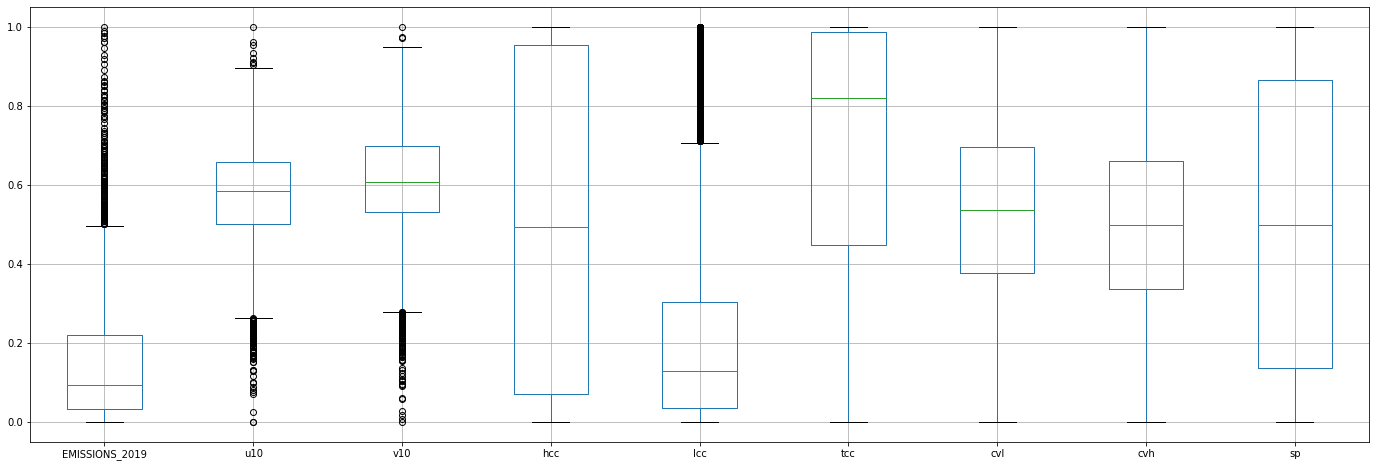

In [ ]:
dataframe_norm.boxplot(figsize=(24,8));

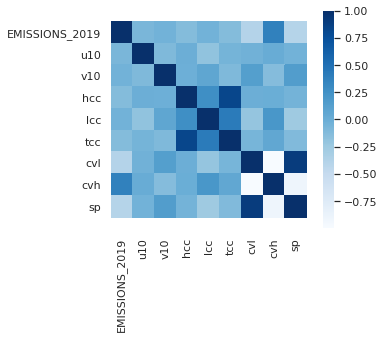

In [ ]:
cov=dataframe_togheter.corr(method='pearson')
sns.heatmap(cov,square=True,annot=False,cmap="Blues");
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


<Figure size 1080x1080 with 0 Axes>

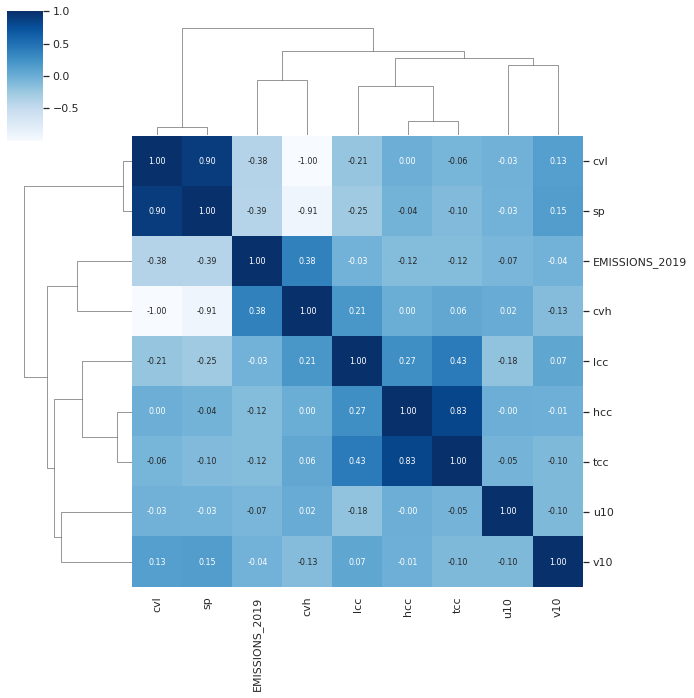

In [ ]:
plt.figure(figsize=(15, 15));
sns.clustermap(cov,square=True,annot=True,cmap="Blues",annot_kws={"size": 8},fmt='.2f');  

#Time series with fixed lat-lon

In [ ]:
df_fix = dataframe_togheter.reset_index()
df_fix = df_fix[df_fix.latitude_bins==44.75]
df_fix = df_fix[df_fix.level_1==8.75]
df_fix = df_fix[['time','EMISSIONS_2019','u10','v10','hcc','lcc','tcc','sp']]
df_fix

,time,EMISSIONS_2019,u10,v10,hcc,lcc,tcc,sp
0,2019-05-01 01:00:00,9.841380e-12,1.913056,-0.315045,2.889117e-03,0.002894,0.026765,100193.968750
1,2019-05-01 02:00:00,8.683572e-12,1.730702,-0.466001,5.778263e-03,0.005117,0.052859,100189.335938
2,2019-05-01 03:00:00,8.104667e-12,1.548347,-0.616957,8.667409e-03,0.007340,0.078953,100184.710938
3,2019-05-01 04:00:00,9.841380e-12,1.316786,-0.746201,5.778263e-03,0.011206,0.101843,100228.242188
4,2019-05-01 05:00:00,1.736714e-11,1.085225,-0.875445,2.889117e-03,0.015071,0.124732,100271.781250
...,...,...,...,...,...,...,...,...
715,2019-05-30 20:00:00,4.206844e-11,-1.670257,1.198840,-2.980232e-08,0.000000,0.026094,101095.804688
716,2019-05-30 21:00:00,3.759307e-11,-2.018507,1.273071,-2.980232e-08,0.000000,0.019990,101172.632812
717,2019-05-30 22:00:00,3.267017e-11,-1.929588,0.535236,-2.980232e-08,0.000000,0.016882,101222.539062
718,2019-05-30 23:00:00,1.924408e-11,-1.840668,-0.202599,-2.980232e-08,0.000000,0.013774,101272.445312


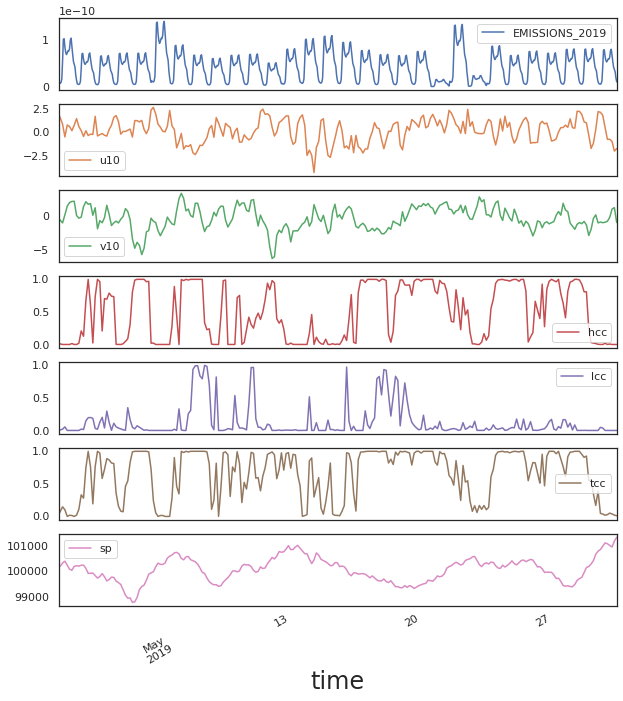

In [ ]:
df_fix.plot(subplots=True, figsize=(10,12), x='time');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

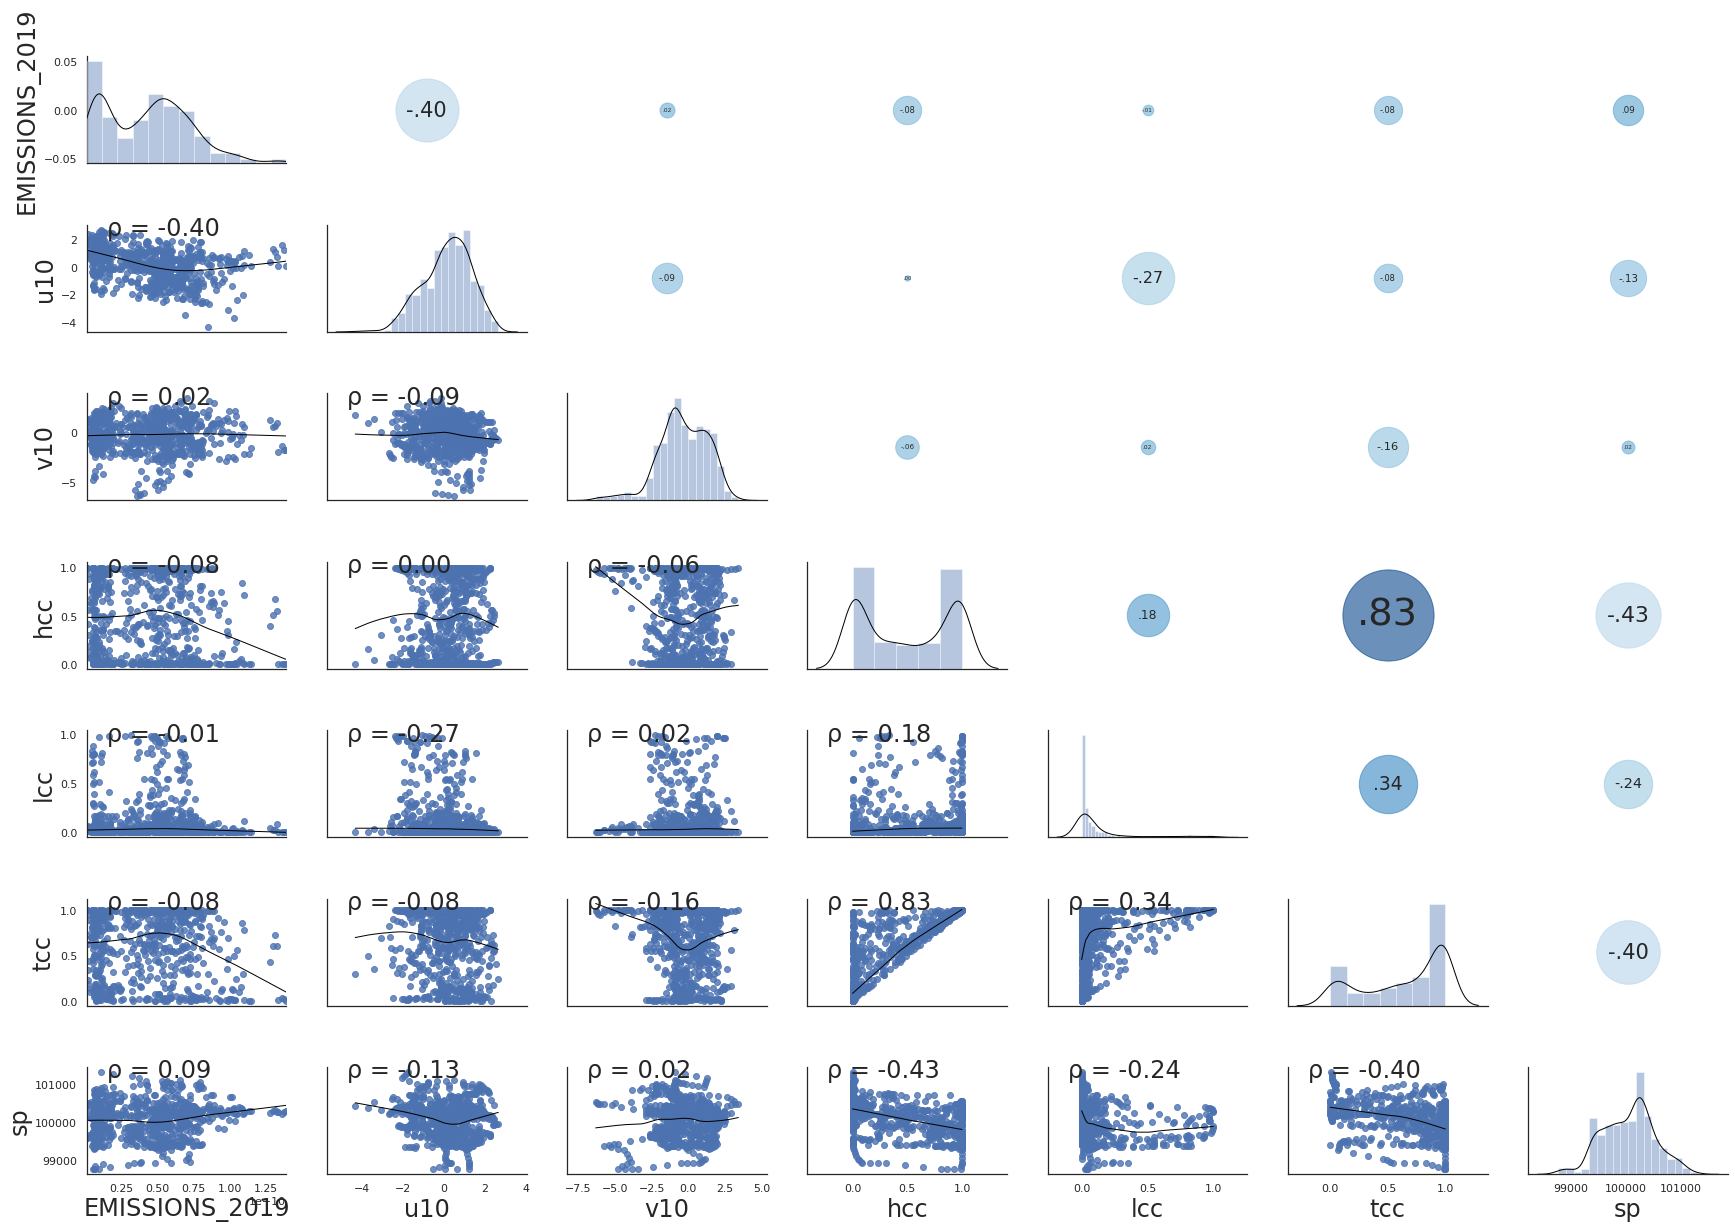

In [ ]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="Blues",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)    
    
# g = sns.pairplot(stocks,palette=["Blues_d"])
g = sns.PairGrid(df_fix, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

In [ ]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time            720 non-null    datetime64[ns]
 1   EMISSIONS_2019  720 non-null    float32       
 2   u10             720 non-null    float32       
 3   v10             720 non-null    float32       
 4   hcc             720 non-null    float32       
 5   lcc             720 non-null    float32       
 6   tcc             720 non-null    float32       
 7   sp              720 non-null    float32       
dtypes: datetime64[ns](1), float32(7)
memory usage: 30.9 KB


In [ ]:
df_fix_change=df_fix.set_index('time')
df_fix_change = df_fix_change.pct_change()
df_fix_change

,EMISSIONS_2019,u10,v10,hcc,lcc,tcc,sp
time,,,,,,,
2019-05-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-01 02:00:00,-0.117647,-0.095321,0.479155,1.000010,0.768016,0.974916,-0.000046
2019-05-01 03:00:00,-0.066667,-0.105364,0.323938,0.500003,0.434394,0.493649,-0.000046
2019-05-01 04:00:00,0.214286,-0.149554,0.209486,-0.333335,0.526680,0.289911,0.000435
2019-05-01 05:00:00,0.764706,-0.175853,0.173203,-0.500003,0.344984,0.224753,0.000434
...,...,...,...,...,...,...,...
2019-05-30 20:00:00,-0.216667,0.263425,0.066006,0.000000,NaN,-0.189573,0.000761
2019-05-30 21:00:00,-0.106383,0.208500,0.061919,0.000000,NaN,-0.233918,0.000760
2019-05-30 22:00:00,-0.130952,-0.044052,-0.579571,0.000000,NaN,-0.155471,0.000493


In [ ]:
df_fix_change.lcc[df_fix_change.lcc.isna()]=0
df_fix_change.lcc[df_fix_change.lcc.isin([np.inf])]=100
df_fix_change=df_fix_change.dropna()
df_fix_change.tail(20)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


,EMISSIONS_2019,u10,v10,hcc,lcc,tcc,sp
time,,,,,,,
2019-05-30 05:00:00,0.764706,-0.052624,0.035934,0.000000,-0.080821,-0.075335,0.000434
2019-05-30 06:00:00,2.200000,-0.055547,0.034687,0.000000,-0.087927,-0.081472,0.000434
2019-05-30 07:00:00,0.822917,-0.236090,-0.021746,-204469.328125,-0.333333,-0.170606,0.000429
2019-05-30 08:00:00,0.011428,-0.309054,-0.022229,1.000005,-0.500000,-0.205699,0.000429
2019-05-30 09:00:00,-0.175141,-0.447292,-0.022734,0.500001,-1.000000,-0.258969,0.000429
2019-05-30 10:00:00,-0.130137,-0.804903,-0.055573,-0.321091,20000.000000,0.166667,-0.000107
2019-05-30 11:00:00,-0.062992,-4.125646,-0.058843,-0.472952,1.000000,0.142857,-0.000107
2019-05-30 12:00:00,0.050420,1.319934,-0.062522,-0.897361,0.500000,0.125000,-0.000107
2019-05-30 13:00:00,0.064000,-0.001460,-0.254458,2.833481,-0.333333,0.288444,-0.000228


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

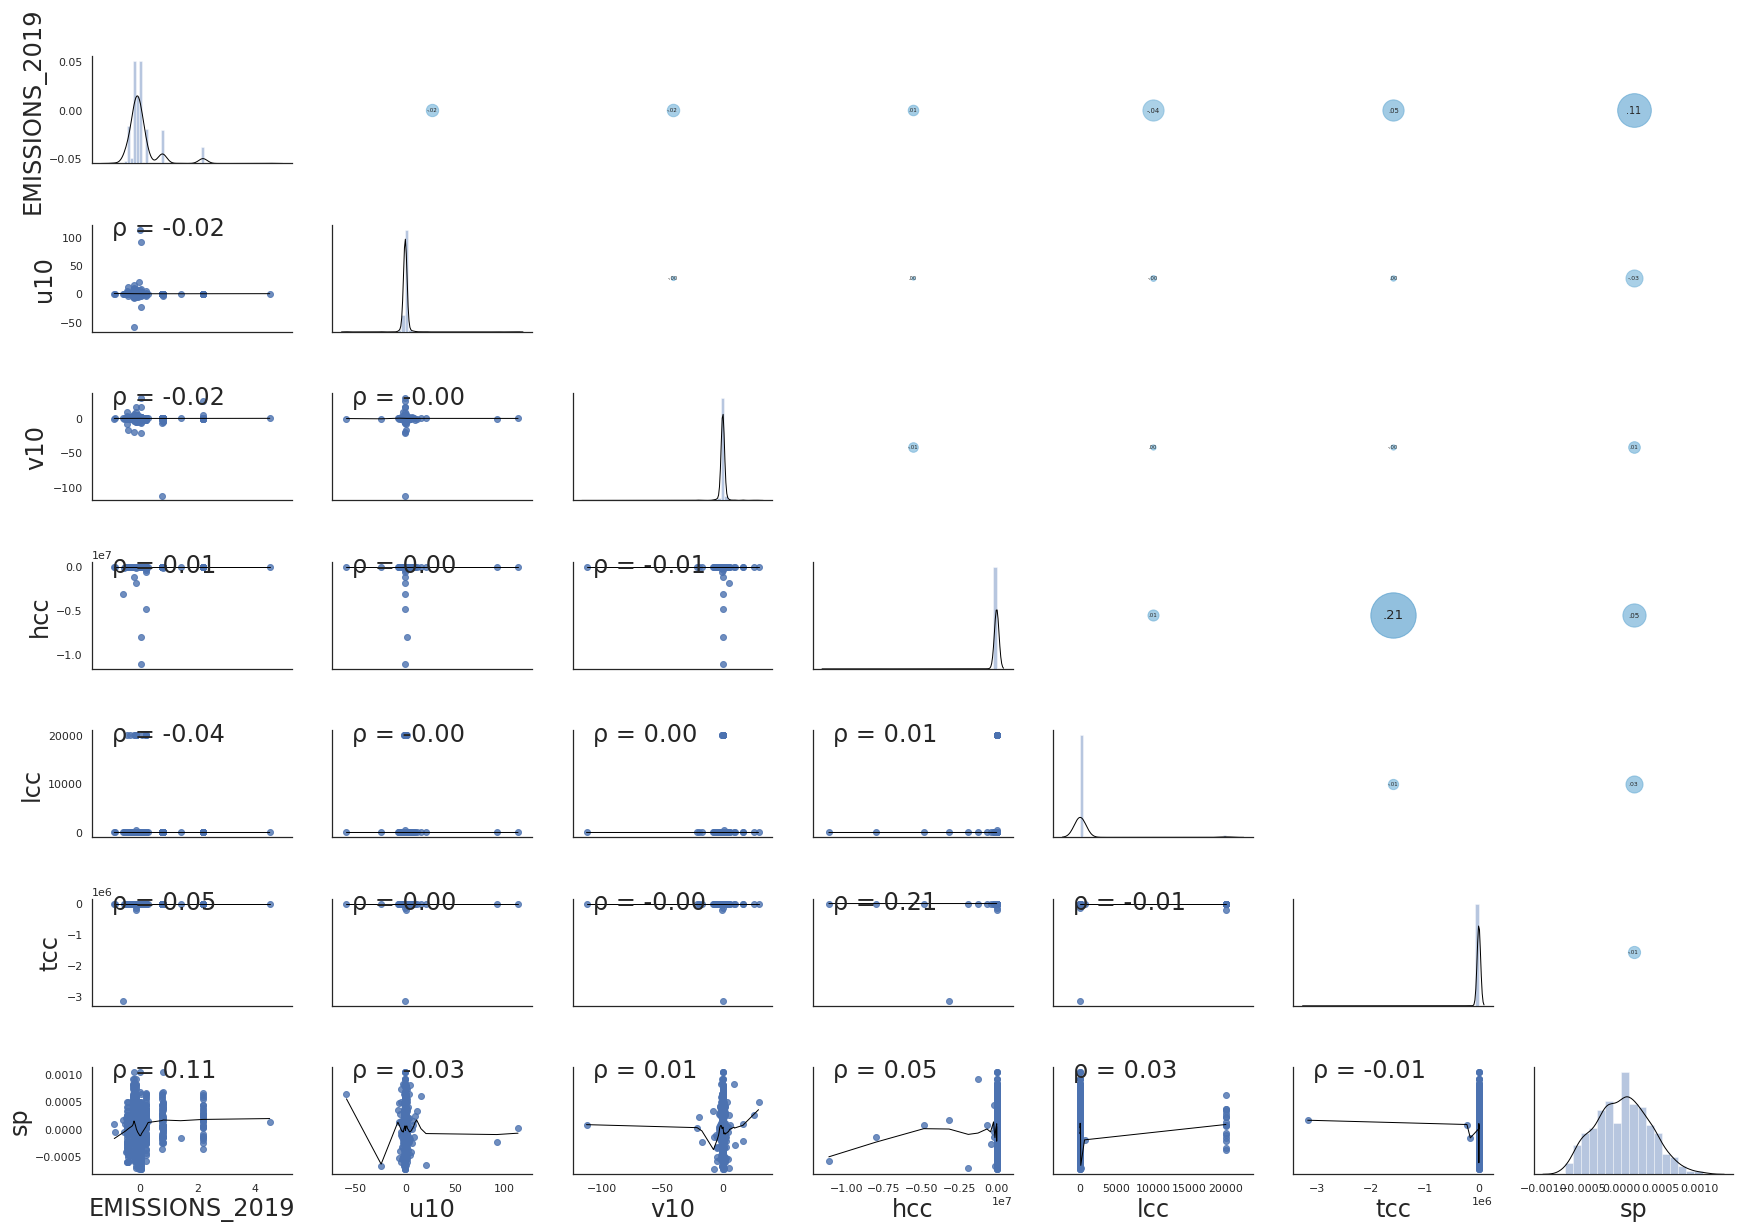

In [ ]:
g = sns.PairGrid(df_fix_change, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

In [ ]:
df_fix_change.tcc[df_fix_change.tcc>100]=100

time
2019-05-01 02:00:00    False
2019-05-01 03:00:00    False
2019-05-01 04:00:00    False
2019-05-01 05:00:00    False
2019-05-01 06:00:00    False
                       ...  
2019-05-30 20:00:00    False
2019-05-30 21:00:00    False
2019-05-30 22:00:00    False
2019-05-30 23:00:00    False
2019-05-31 00:00:00    False
Name: tcc, Length: 719, dtype: bool